# <font color='red'>Implement SGD Classifier with Logloss and L2 regularization Using SGD without using sklearn</font>

**There will be some functions that start with the word "grader" ex: grader_weights(), grader_sigmoid(), grader_logloss() etc, you should not change those function definition.<br><br>Every Grader function has to return True.**

<font color='red'> Importing packages</font>

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model

<font color='red'>Creating custom dataset</font>

In [2]:
# please don't change random_state
X, y = make_classification(n_samples=50000, n_features=15, n_informative=10, n_redundant=5,
                           n_classes=2, weights=[0.7], class_sep=0.7, random_state=15)
# make_classification is used to create custom dataset 
# Please check this link (https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) for more details

In [3]:
X.shape, y.shape

((50000, 15), (50000,))

<font color='red'>Splitting data into train and test </font>

In [4]:
#please don't change random state
# you need not standardize the data as it is already standardized
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15)

In [5]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((37500, 15), (37500,), (12500, 15), (12500,))

# <font color='red' size=5>SGD classifier</font>

In [6]:
# alpha : float
# Constant that multiplies the regularization term. 

# eta0 : double
# The initial learning rate for the ‘constant’, ‘invscaling’ or ‘adaptive’ schedules.

clf = linear_model.SGDClassifier(eta0=0.0001, alpha=0.0001, loss='log', random_state=15, penalty='l2', tol=1e-3, verbose=2, learning_rate='constant')
clf
# Please check this documentation (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html) 

SGDClassifier(eta0=0.0001, learning_rate='constant', loss='log',
              random_state=15, verbose=2)

In [7]:
clf.fit(X=X_train, y=y_train) # fitting our model

-- Epoch 1
Norm: 0.77, NNZs: 15, Bias: -0.316653, T: 37500, Avg. loss: 0.455552
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 0.91, NNZs: 15, Bias: -0.472747, T: 75000, Avg. loss: 0.394686
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 0.98, NNZs: 15, Bias: -0.580082, T: 112500, Avg. loss: 0.385711
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 1.02, NNZs: 15, Bias: -0.658292, T: 150000, Avg. loss: 0.382083
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 1.04, NNZs: 15, Bias: -0.719528, T: 187500, Avg. loss: 0.380486
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 1.05, NNZs: 15, Bias: -0.763409, T: 225000, Avg. loss: 0.379578
Total training time: 0.03 seconds.
-- Epoch 7
Norm: 1.06, NNZs: 15, Bias: -0.795106, T: 262500, Avg. loss: 0.379150
Total training time: 0.04 seconds.
-- Epoch 8
Norm: 1.06, NNZs: 15, Bias: -0.819925, T: 300000, Avg. loss: 0.378856
Total training time: 0.04 seconds.
-- Epoch 9
Norm: 1.07, NNZs: 15, Bias: -0.837805, T: 337500, Avg. loss: 0.

SGDClassifier(eta0=0.0001, learning_rate='constant', loss='log',
              random_state=15, verbose=2)

In [8]:
clf.coef_, clf.coef_.shape, clf.intercept_
#clf.coef_ will return the weights
#clf.coef_.shape will return the shape of weights
#clf.intercept_ will return the intercept term

(array([[-0.42336692,  0.18547565, -0.14859036,  0.34144407, -0.2081867 ,
          0.56016579, -0.45242483, -0.09408813,  0.2092732 ,  0.18084126,
          0.19705191,  0.00421916, -0.0796037 ,  0.33852802,  0.02266721]]),
 (1, 15),
 array([-0.8531383]))




## <font color='red' size=5> Implement Logistic Regression with L2 regularization Using SGD: without using sklearn </font>






1.  We will be giving you some functions, please write code in that functions only.

2.  After every function, we will be giving you expected output, please make sure that you get that output. 






<br>

* Initialize the weight_vector and intercept term to zeros (Write your code in <font color='blue'>def initialize_weights()</font>)

* Create a loss function (Write your code in <font color='blue'>def logloss()</font>) 

 $log loss = -1*\frac{1}{n}\Sigma_{for each Yt,Y_{pred}}(Ytlog10(Y_{pred})+(1-Yt)log10(1-Y_{pred}))$
- for each epoch:

    - for each batch of data points in train: (keep batch size=1)

        - calculate the gradient of loss function w.r.t each weight in weight vector (write your code in <font color='blue'>def gradient_dw()</font>)

        $dw^{(t)} = x_n(y_n − σ((w^{(t)})^{T} x_n+b^{t}))- \frac{λ}{N}w^{(t)})$ <br>

        - Calculate the gradient of the intercept (write your code in <font color='blue'> def gradient_db()</font>) <a href='https://drive.google.com/file/d/1nQ08-XY4zvOLzRX-lGf8EYB5arb7-m1H/view?usp=sharing'>check this</a>

           $ db^{(t)} = y_n- σ((w^{(t)})^{T} x_n+b^{t}))$

        - Update weights and intercept (check the equation number 32 in the above mentioned <a href='https://drive.google.com/file/d/1nQ08-XY4zvOLzRX-lGf8EYB5arb7-m1H/view?usp=sharing'>pdf</a>): <br>
        $w^{(t+1)}← w^{(t)}+α(dw^{(t)}) $<br>

        $b^{(t+1)}←b^{(t)}+α(db^{(t)}) $
    - calculate the log loss for train and test with the updated weights (you can check the python assignment 10th question)
    - And if you wish, you can compare the previous loss and the current loss, if it is not updating, then
        you can stop the training
    - append this loss in the list ( this will be used to see how loss is changing for each epoch after the training is over )


<font color='blue'>Initialize weights </font>

In [56]:
def initialize_weights(dim):
    ''' In this function, we will initialize our weights and bias'''
   
    w = np.zeros_like(dim)
    b = 0
    #initialize the weights as 1d array consisting of all zeros similar to the dimensions of row_vector
    #you use zeros_like function to initialize zero, check this link https://docs.scipy.org/doc/numpy/reference/generated/numpy.zeros_like.html
    #initialize bias to zero
    return w,b

<font color='red'>Grader function - 1 </font>

In [57]:
dim=X_train[0] 
w,b = initialize_weights(dim)
def grader_weights(w,b):
    assert((len(w)==len(dim)) and b==0 and np.sum(w)==0.0)
    return True
grader_weights(w,b)

True

<font color='blue'>Compute sigmoid </font>

$sigmoid(z)= 1/(1+exp(-z))$

In [60]:
def sigmoid(z):
    ''' In this function, we will return sigmoid of z'''
    
    return 1.0/(1+np.exp(-z))

<font color='red'>Grader function - 2</font>

In [61]:
def grader_sigmoid(z):
    val=sigmoid(z)
    assert(val==0.8807970779778823)
    return True
grader_sigmoid(2)

True

<font color='blue'> Compute loss </font>

$log loss = -1*\frac{1}{n}\Sigma_{for each Yt,Y_{pred}}(Ytlog10(Y_{pred})+(1-Yt)log10(1-Y_{pred}))$

In [62]:
def logloss(y_true,y_pred):
    # you have been given two arrays y_true and y_pred and you have to calculate the logloss
    #while dealing with numpy arrays you can use vectorized operations for quicker calculations as compared to using loops
    #https://www.pythonlikeyoumeanit.com/Module3_IntroducingNumpy/VectorizedOperations.html
    #https://www.geeksforgeeks.org/vectorized-operations-in-numpy/
    #write your code here
    sum_loss = 0
    for i in range(len(y_true)):
        sum_loss+= ((y_true[i] * np.log10(y_pred[i])) + ((1-y_true[i]) * np.log10(1-y_pred[i])))
        loss = -1*(1/len(y_true))*sum_loss

    
    return loss

<font color='red'>Grader function - 3 </font>

In [63]:
#round off the value to 8 values
def grader_logloss(true,pred):
    loss=logloss(true,pred)
    assert(np.round(loss,6)==0.076449)
    return True
true=np.array([1,1,0,1,0])
pred=np.array([0.9,0.8,0.1,0.8,0.2])
grader_logloss(true,pred)

True

<font color='blue'>Compute gradient w.r.to  'w' </font>

$dw^{(t)} = x_n(y_n − σ((w^{(t)})^{T} x_n+b^{t}))- \frac{λ}{N}w^{(t)}$ <br>

In [64]:

#make sure that the sigmoid function returns a scalar value, you can use dot function operation
def gradient_dw(x,y,w,b,alpha,N):
    '''In this function, we will compute the gardient w.r.to w '''
    z = np.dot(w, x) + b
    dw = x*(y - sigmoid(z)) - ((alpha)*(1/N) * w)
    return dw
    
   

<font color='red'>Grader function - 4 </font>

In [65]:
def grader_dw(x,y,w,b,alpha,N):
  grad_dw=gradient_dw(x,y,w,b,alpha,N)
  assert(np.round(np.sum(grad_dw),5)==4.75684)
  return True
grad_x=np.array([-2.07864835,  3.31604252, -0.79104357, -3.87045546, -1.14783286,
       -2.81434437, -0.86771071, -0.04073287,  0.84827878,  1.99451725,
        3.67152472,  0.01451875,  2.01062888,  0.07373904, -5.54586092])
grad_y=0
grad_w=np.array([ 0.03364887,  0.03612727,  0.02786927,  0.08547455, -0.12870234,
       -0.02555288,  0.11858013,  0.13305576,  0.07310204,  0.15149245,
       -0.05708987, -0.064768  ,  0.18012332, -0.16880843, -0.27079877])
grad_b=0.5
alpha=0.0001
N=len(X_train)
grader_dw(grad_x,grad_y,grad_w,grad_b,alpha,N)

True

<font color='blue'>Compute gradient w.r.to 'b' </font>

$ db^{(t)} = y_n- σ((w^{(t)})^{T} x_n+b^{t})$

In [73]:
#sb should be a scalar value
def gradient_db(x,y,w,b):
    z = np.dot(w, x) + b
    db = y - sigmoid(z)
    
    
     
    
    return db

<font color='red'>Grader function - 5 </font>

In [74]:
def grader_db(x,y,w,b):
  grad_db=gradient_db(x,y,w,b)
  assert(np.round(grad_db,4)==-0.3714)
  return True
grad_x=np.array([-2.07864835,  3.31604252, -0.79104357, -3.87045546, -1.14783286,
       -2.81434437, -0.86771071, -0.04073287,  0.84827878,  1.99451725,
        3.67152472,  0.01451875,  2.01062888,  0.07373904, -5.54586092])
grad_y=0.5
grad_b=0.1
grad_w=np.array([ 0.03364887,  0.03612727,  0.02786927,  0.08547455, -0.12870234,
       -0.02555288,  0.11858013,  0.13305576,  0.07310204,  0.15149245,
       -0.05708987, -0.064768  ,  0.18012332, -0.16880843, -0.27079877])
alpha=0.0001
N=len(X_train)
grader_db(grad_x,grad_y,grad_w,grad_b)

True

In [75]:
# prediction function used to compute predicted_y given the dataset X
def pred(w,b, X):
    N = len(X)
    predict = []
    for i in range(N):
        z=np.dot(w,X[i])+b
        predict.append(sigmoid(z))
    return np.array(predict)


In [86]:
def train(X_train, y_train, X_test, y_test, epochs, alpha, eta0, tol=1e-3):
    """ In this function, we will implement logistic regression"""
    # Here eta0 is learning rate
    # implement the code as follows
    # initialize the weights (call the initialize_weights(X_train[0]) function)
    w, b = initialize_weights(X_train[0])
    # for every epoch
    train_loss = []
    test_loss = []
    N = len(X_train)

    loss_threshold = 0.0001

    while True:
        for epoch in range(epochs):            
            
            # for every data point(X_train,y_train)
            for row in range(N - 1):
                # compute gradient w.r.to w (call the gradient_dw() function)
                delta_weights = gradient_dw(
                    X_train[row], y_train[row], w, b, alpha, len(X_train)
                )

                # compute gradient w.r.to b (call the gradient_db() function)
                delta_bias = gradient_db(X_train[row], y_train[row], w, b)

                # update w, b
                w = w + eta0 * delta_weights
                b = b + eta0 * delta_bias

            # predict the output of x_train[for all data points in X_train] using w,b
            # y_prediction_train — a numpy array (vector) containing all predictions (0/1) for the examples in X
            y_prediction_train = [  
            sigmoid(np.dot(w, x_row) + b) for x_row in X_train
            ]

            # compute the loss between predicted and actual values (call the loss function)
            # store all the train loss values in a list
            train_loss.append(logloss(y_train, y_prediction_train))

            # predict the output of x_test[for all data points in X_test] using w,b
            y_prediction_test = [
                sigmoid(np.dot(w, x_row) + b) for x_row in X_test
            ]

            print(
                f"For EPOCH No : {epoch} Train Loss is : {logloss(y_train, y_prediction_train)} and Test Loss is : {logloss(y_test, y_prediction_test)}"
            )

            # compute the loss between predicted and actual values (call the loss function)
            test_loss.append(logloss(y_test, y_prediction_test))

        # you can also compare previous loss and current loss
        # if the loss is not updating then stop the process and return w,b
        # i.e. loss is still reducing with each epoch but the reduction is insignificant ( < loss_threshold )
        if (
            len(test_loss) > 3
            and (test_loss[-2] - test_loss[-1]) > 0
            and (test_loss[-2] - test_loss[-1])
        ) < loss_threshold:
            break

    return w, b, train_loss, test_loss

<font color='blue'> Implementing logistic regression</font>

In [81]:
def sgd_algo(x_train,y_train,x_test,y_test,eta0,alpha,w,b,epoch):
    train_loss=[]
    test_loss=[]
    epoc=[]
    for i in  range(0,epoch): 
        epoc.append(i)
        for j in range(0,N):
            reg=alpha/2*np.dot(w.T,w) #regulrization term
            w = ((1-eta0*(alpha/N))*w)+((eta0*x_train[j])*(y_train[j]-sigmoid(w,x_train[j],b))) # updating weight vector
            b = b+(eta0*(y_train[j]-sigmoid(w,x_train[j],b)))       # updatind intercept    
        train=logloss(w,x_train,y_train,b,reg)
        train_loss.append(train)    # calculating train and test loss for updated w,b on each epoch
        test=logloss(w,x_test,y_test,b,reg)
        test_loss.append(test)
        """ 
       if i==0 :
            continue                                              # block to check covergence
        else:                                                     # but checking not getting optimium value as sklearn implementation
            if abs(train_loss[i]-train_loss[i-1])>.001:
                continue
            else:
                break"""
    return w,b ,train_loss,test_loss,epoc

In [88]:
alpha=0.0001
eta0=0.0001
N=len(X_train)
epochs=50

w,b, train_loss, test_loss =train(X_train,y_train,X_test,y_test,epochs,alpha,eta0)

For EPOCH No : 0 Train Loss is : 0.17546017245116638 and Test Loss is : 0.17595304686476884
For EPOCH No : 1 Train Loss is : 0.168673810981216 and Test Loss is : 0.169396712956042
For EPOCH No : 2 Train Loss is : 0.1663938863347515 and Test Loss is : 0.1672030481451238
For EPOCH No : 3 Train Loss is : 0.1653705122246269 and Test Loss is : 0.16621421081135485
For EPOCH No : 4 Train Loss is : 0.16485934469277722 and Test Loss is : 0.16571657614420096
For EPOCH No : 5 Train Loss is : 0.16459049621905653 and Test Loss is : 0.16545252197160182
For EPOCH No : 6 Train Loss is : 0.16444502841767486 and Test Loss is : 0.16530828102790057
For EPOCH No : 7 Train Loss is : 0.1643649653082423 and Test Loss is : 0.16522808518654428
For EPOCH No : 8 Train Loss is : 0.1643204089310519 and Test Loss is : 0.16518296541343255
For EPOCH No : 9 Train Loss is : 0.16429542090529878 and Test Loss is : 0.1651573554528951
For EPOCH No : 10 Train Loss is : 0.16428132726823472 and Test Loss is : 0.165142713681338

In [89]:
#print thr value of weights w and bias b
print(w)
print(b)

[-4.29942508e-01  1.93197429e-01 -1.48421190e-01  3.37987345e-01
 -2.21228307e-01  5.69902679e-01 -4.45126487e-01 -8.97488960e-02
  2.22235887e-01  1.73858600e-01  1.98740834e-01 -5.31288385e-04
 -8.12497229e-02  3.38996001e-01  2.29775164e-02]
-0.8921843536650486


In [90]:
# these are the results we got after we implemented sgd and found the optimal weights and intercept

w-clf.coef_, b-clf.intercept_

(array([[-0.00657559,  0.00772178,  0.00016917, -0.00345672, -0.0130416 ,
          0.00973689,  0.00729834,  0.00433923,  0.01296269, -0.00698266,
          0.00168893, -0.00475045, -0.00164603,  0.00046798,  0.00031031]]),
 array([-0.03904606]))

## <font color='red'>Goal of assignment</font>

Compare your implementation and SGDClassifier's the weights and intercept, make sure they are as close as possible i.e difference should be in order of 10^-2

<font color='red'>Grader function - 6 </font>

In [91]:
#this grader function should return True
#the difference between custom weights and clf.coef_ should be less than or equal to 0.05
def differece_check_grader(w,b,coef,intercept):
    val_array=np.abs(np.array(w-coef))
    assert(np.all(val_array<=0.05))
    print('The custom weights are correct')
    return True
differece_check_grader(w,b,clf.coef_,clf.intercept_)   

The custom weights are correct


True

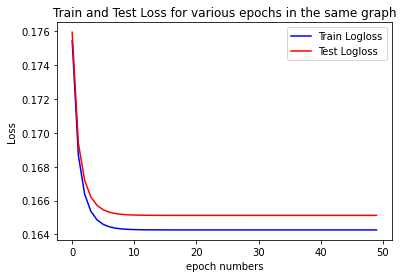

In [93]:
import matplotlib.pyplot as plt
x = np.array([i for i in range(0, 50)])

train_log_loss = np.array(train_loss)
test_log_loss = np.array(test_loss)

plt.plot(x, train_log_loss, "-b", label="Train Logloss")
plt.plot(x, test_log_loss, "-r", label="Test Logloss")

plt.legend(loc="upper right")

plt.xlabel('epoch numbers')
plt.ylabel('Loss')
plt.title('Train and Test Loss for various epochs in the same graph')
plt.show()

<font color='blue'>Plot your train and test loss vs epochs </font>

plot epoch number on X-axis and loss on Y-axis and make sure that the curve is converging

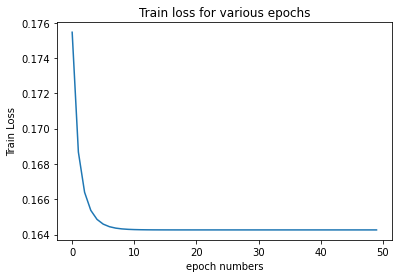

In [94]:
x = np.array([i for i in range(0, 50)])
y = np.array(train_loss)
plt.plot(x, y)
plt.xlabel('epoch numbers')
plt.ylabel('Train Loss')
plt.title('Train loss for various epochs')
plt.show()

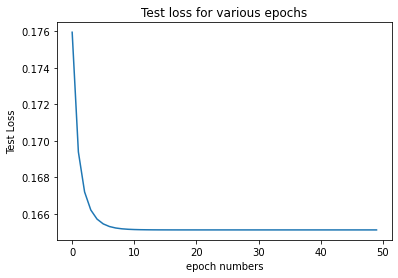

In [95]:

x = np.array([i for i in range(0, 50)])
y = np.array(test_loss)
plt.plot(x, y)
plt.xlabel('epoch numbers')
plt.ylabel('Test Loss')
plt.title('Test loss for various epochs')
plt.show()

In [96]:
def pred(w,b, X):
    N = len(X)
    predict = []
    for i in range(N):
        z=np.dot(w,X[i])+b
        if sigmoid(z) >= 0.5: # sigmoid(w,x,b) returns 1/(1+exp(-(dot(x,w)+b)))
            predict.append(1)
        else:
            predict.append(0)
    return np.array(predict)
print(1-np.sum(y_train - pred(w,b,X_train))/len(X_train))
print(1-np.sum(y_test  - pred(w,b,X_test))/len(X_test))

0.9523733333333333
0.94992
